In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import os
os.environ["TEXMFVAR"] = "/usr/local/texlive/2025/texmf-var/"


In [2]:
import matplotlib as mpl
print("Using TeX:", mpl.rcParams['text.usetex'])
print("LaTeX preamble:", mpl.rcParams['text.latex.preamble'])

Using TeX: True
LaTeX preamble: 


In [3]:
fp = "/Users/alec/Desktop/RNAanalysis/Datacsv.csv"
df = pd.read_csv(fp)
df.head()

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1,476.838460,6.088545,0.117768,51.699649,0.0,0.0
1,2,539.439737,-4.380346,0.109281,-40.083180,0.0,0.0
2,3,1180.420816,-3.727957,0.077039,-48.390484,0.0,0.0
3,4,53542.133222,-4.770429,0.052575,-90.736018,0.0,0.0
4,5,307.988944,-4.142868,0.102250,-40.517031,0.0,0.0


In [4]:
df = df[df['pvalue'] != 'NA']

In [5]:
df.dropna(inplace=True)

In [6]:
print(df)

     Unnamed: 0      baseMean  log2FoldChange     lfcSE       stat    pvalue  \
0             1    476.838460        6.088545  0.117768  51.699649  0.000000   
1             2    539.439737       -4.380346  0.109281 -40.083180  0.000000   
2             3   1180.420816       -3.727957  0.077039 -48.390484  0.000000   
3             4  53542.133222       -4.770429  0.052575 -90.736018  0.000000   
4             5    307.988944       -4.142868  0.102250 -40.517031  0.000000   
..          ...           ...             ...       ...        ...       ...   
304         305      1.610531       -0.170064  3.176564  -0.053537  0.957304   
305         306      1.432812       -0.099006  2.409736  -0.041086  0.967227   
306         307      0.443943       -0.106359  2.921120  -0.036410  0.970955   
307         308     20.336889        0.005974  0.302636   0.019741  0.984250   
312         313      6.129374        0.003305  0.791920   0.004173  0.996670   

         padj  
0    0.000000  
1    0.

In [7]:
df['neg_log10_padj'] = -np.log10(df['padj'])


/Users/alec/miniconda3/envs/RNAanalysis/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
df = df[df['padj'] != 0]

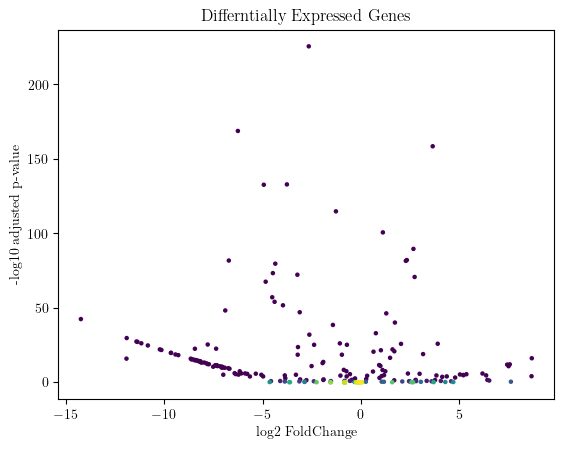

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(df['log2FoldChange'], df['neg_log10_padj'], c=df['pvalue'], s=5, cmap='viridis')
ax.set_xlabel('log2 FoldChange')
ax.set_ylabel('-log10 adjusted p-value')
ax.set_title('Differntially Expressed Genes')
plt.show()

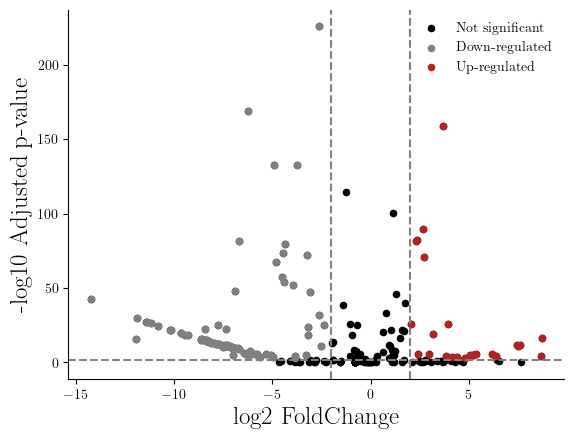

In [10]:
fig, ax = plt.subplots()
marker_size = 20
ax.scatter(df['log2FoldChange'],-np.log10(df['padj']),s=marker_size,label="Not significant",c="black")

# highlight down- or up- regulated genes
down = df[(df['log2FoldChange']<=-2)&(df['padj']<=0.01)]
up = df[(df['log2FoldChange']>=2)&(df['padj']<=0.01)]

ax.scatter(down['log2FoldChange'],-np.log10(down['padj']),s=marker_size,label="Down-regulated",c="gray")
ax.scatter(up['log2FoldChange'],-np.log10(up['padj']),s=marker_size,label="Up-regulated",c="firebrick")

ax.set_xlabel("log2 FoldChange", fontsize=18)
ax.set_ylabel("-log10 Adjusted p-value", fontsize=18)
ax.axvline(-2,color="grey",linestyle="--")
ax.axvline(2,color="grey",linestyle="--")
ax.axhline(2,color="grey",linestyle="--")
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("volcanoplot2.png", dpi=600)

In [11]:
negative_count = len(df[(df['log2FoldChange'] < 0) & (df['pvalue'] <= 0.01)])
print(negative_count)

94


In [12]:
negative_count = len(df[(df['log2FoldChange'] > 0) & (df['pvalue'] <= 0.01)])
print(negative_count)

44


In [13]:
total_rows = df.shape[0]
print(total_rows)

228


In [14]:
negative_count = len(df[df['log2FoldChange'] < 0])
print(negative_count)

156


In [15]:
def list_files_with_string(directory, string):
    files = []
    for filename in os.listdir(directory):
        if string in filename:
            files.append(directory + filename)
    return files

directory = "/Users/alec/Desktop/RNAanalysis/"
string = "deseq2Timepoint1"

data_files = list_files_with_string(directory, string)

In [16]:
dfs = []
for data_file in data_files:
    df = pd.read_csv(data_file)
    dfs.append(df)

print(len(dfs))

0


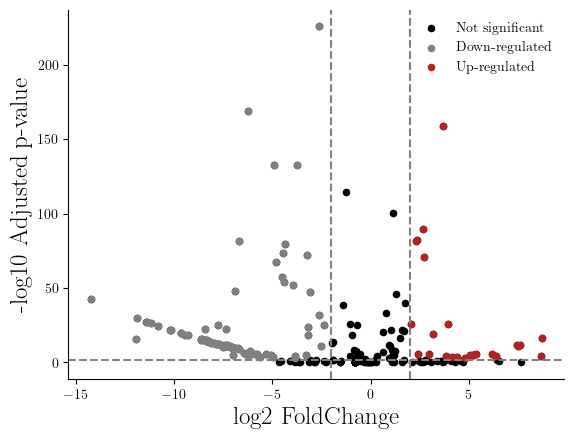

In [17]:

fig, ax = plt.subplots()
marker_size = 20
ax.scatter(df['log2FoldChange'],-np.log10(df['padj']),s=marker_size,label="Not significant",c="black")

# highlight down- or up- regulated genes
down = df[(df['log2FoldChange']<=-2)&(df['padj']<=0.01)]
up = df[(df['log2FoldChange']>=2)&(df['padj']<=0.01)]

ax.scatter(down['log2FoldChange'],-np.log10(down['padj']),s=marker_size,label="Down-regulated",c="gray")
ax.scatter(up['log2FoldChange'],-np.log10(up['padj']),s=marker_size,label="Up-regulated",c="firebrick")

ax.set_xlabel("log2 FoldChange", fontsize=18)
ax.set_ylabel("-log10 Adjusted p-value", fontsize=18)
ax.axvline(-2,color="grey",linestyle="--")
ax.axvline(2,color="grey",linestyle="--")
ax.axhline(2,color="grey",linestyle="--")
ax.legend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("volcanoplot2.png", dpi=600)